### Race in 2020

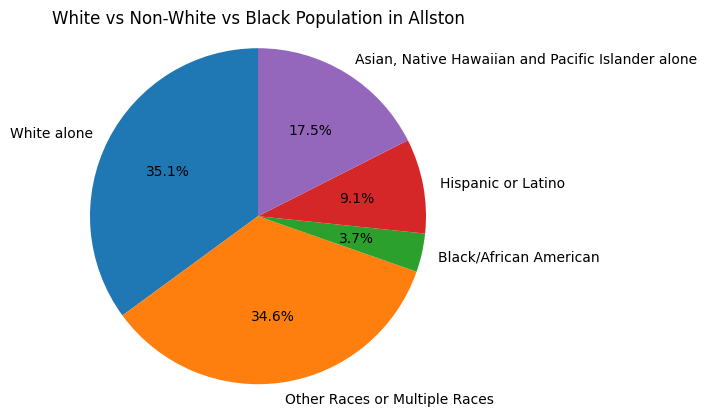

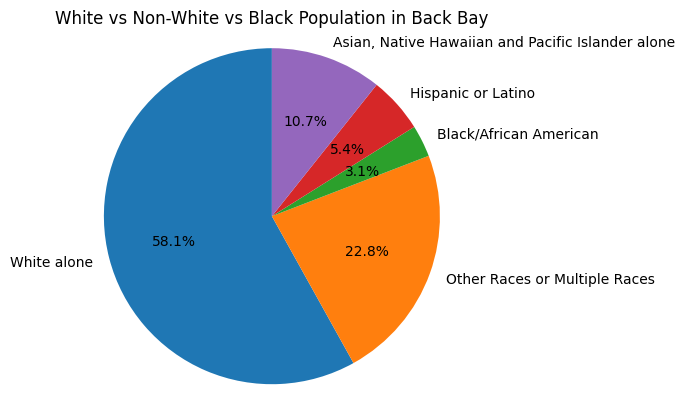

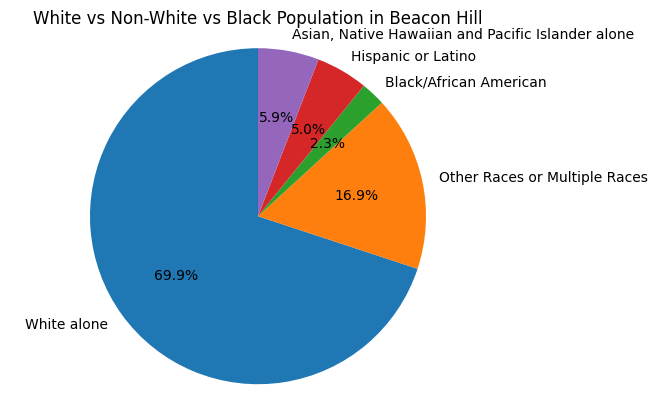

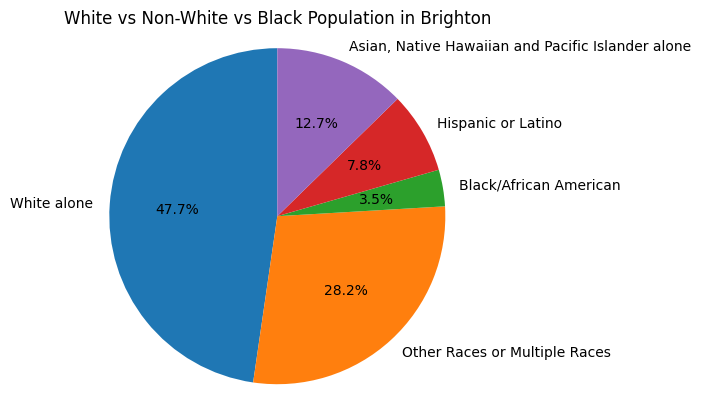

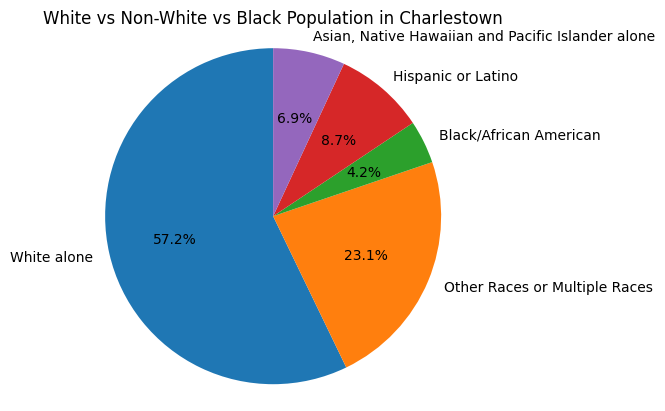

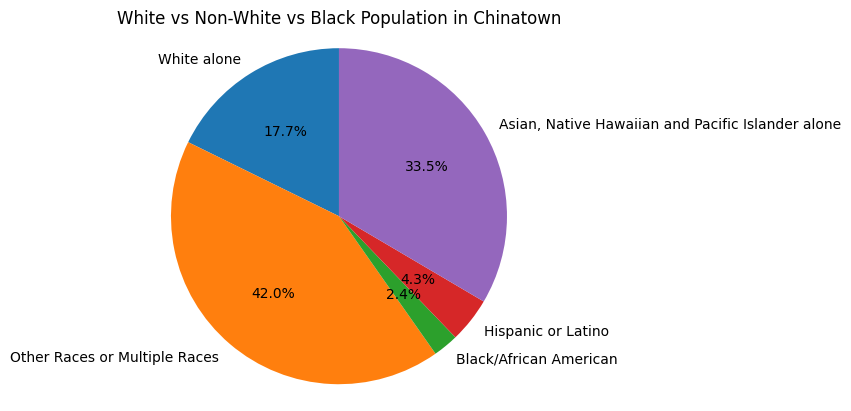

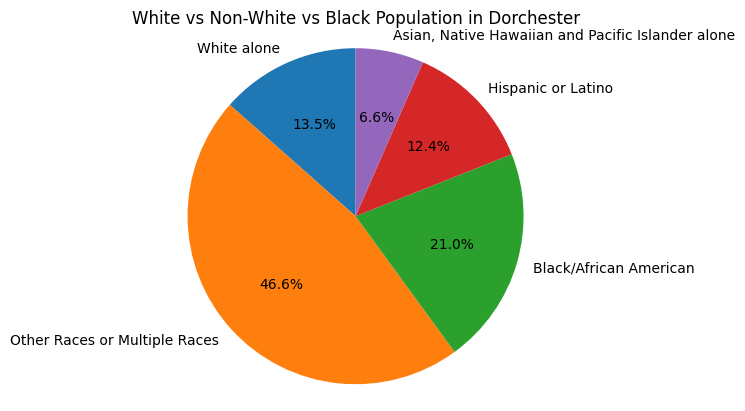

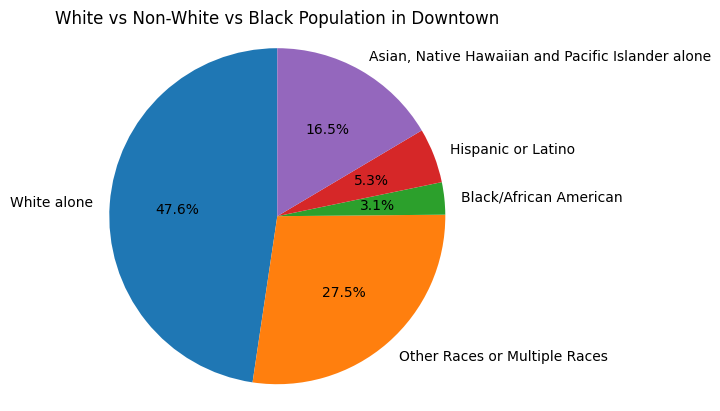

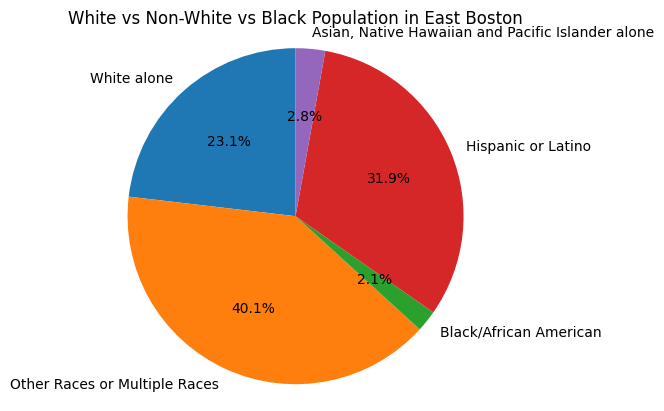

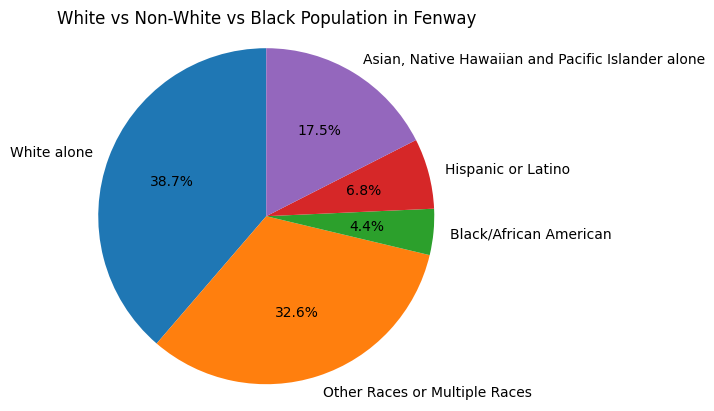

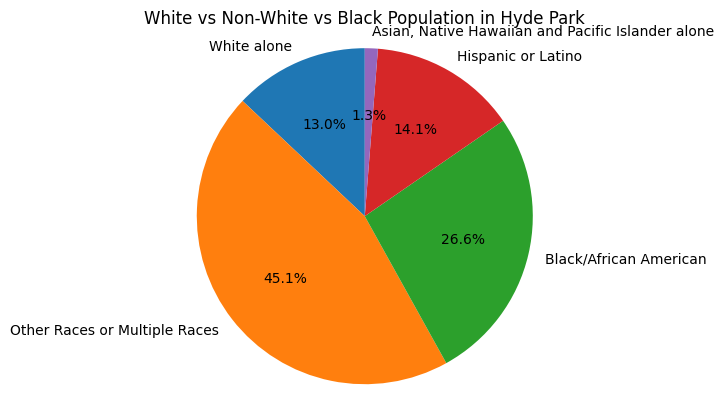

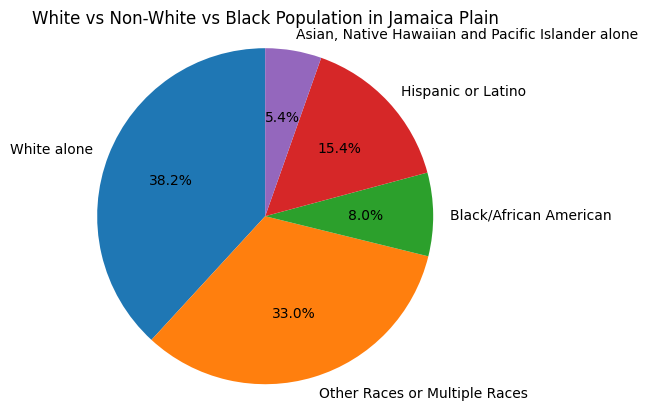

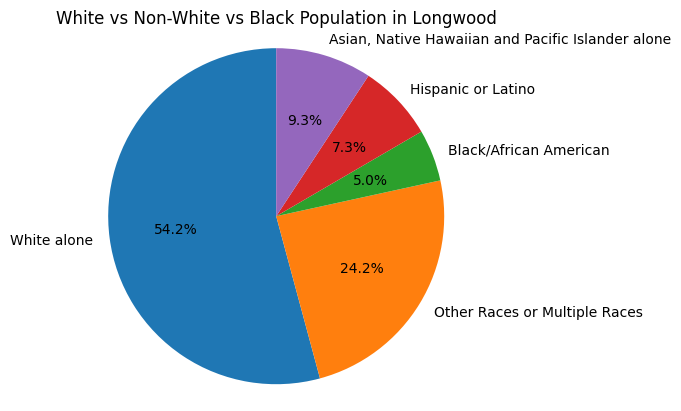

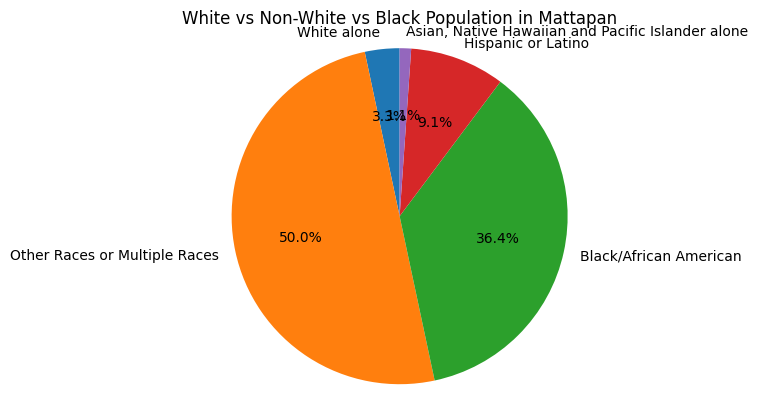

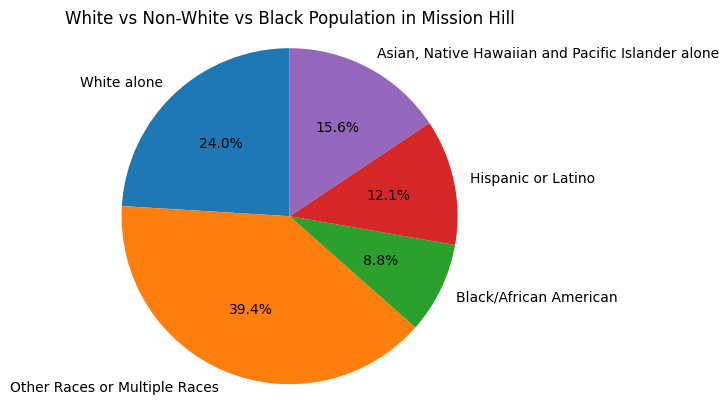

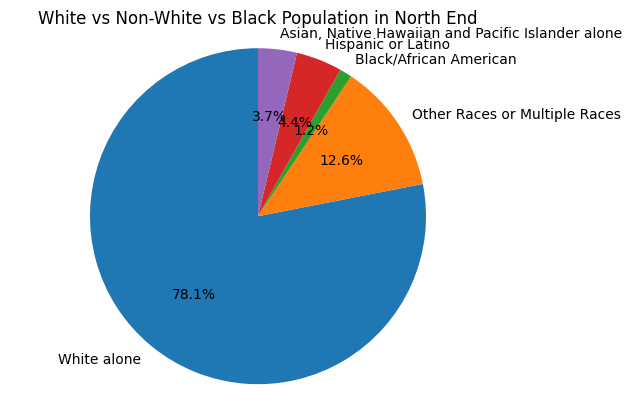

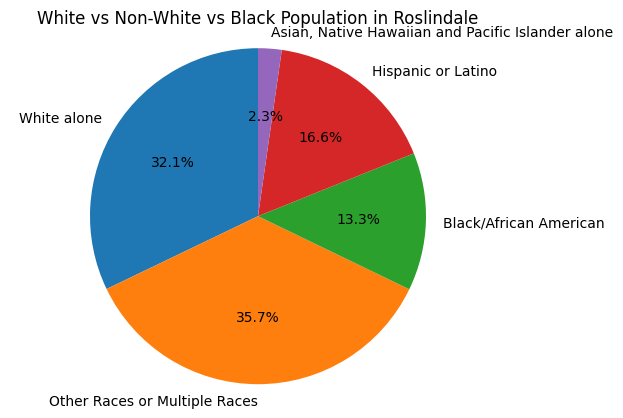

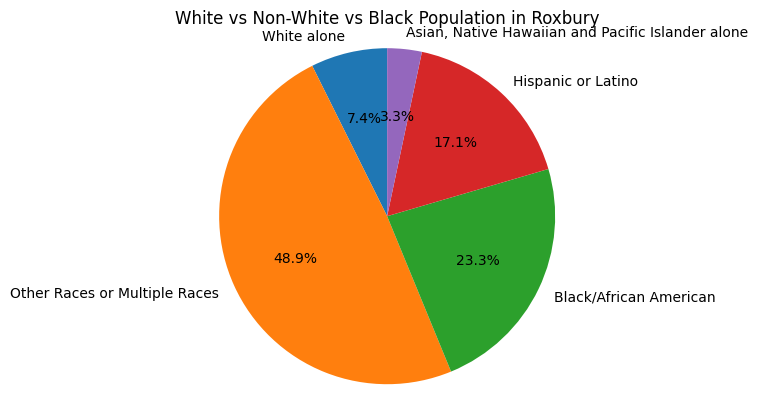

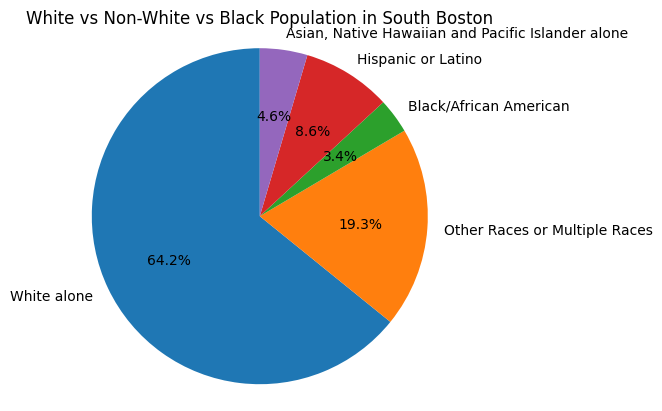

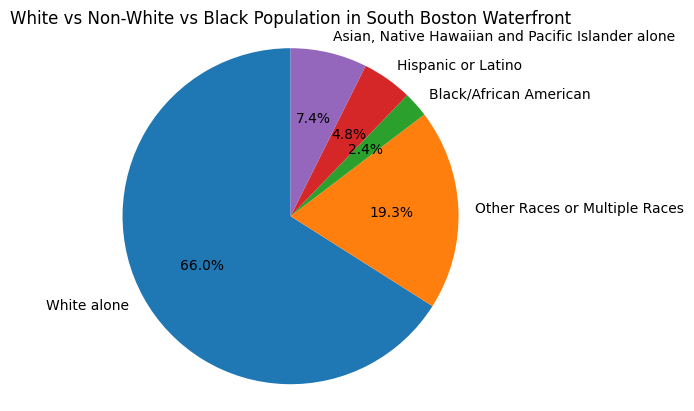

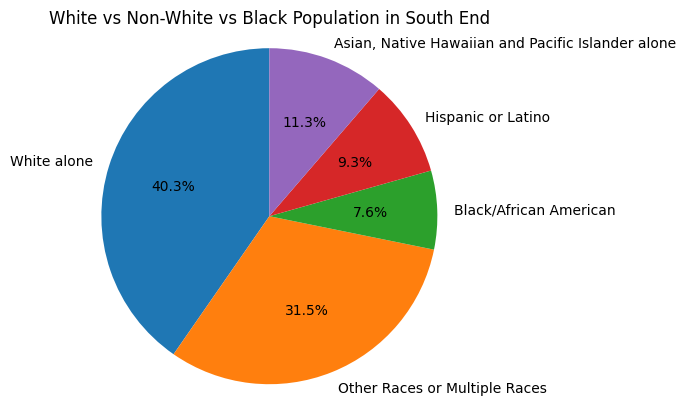

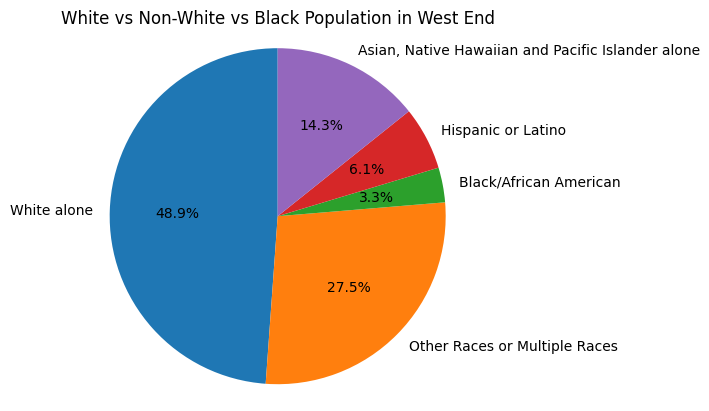

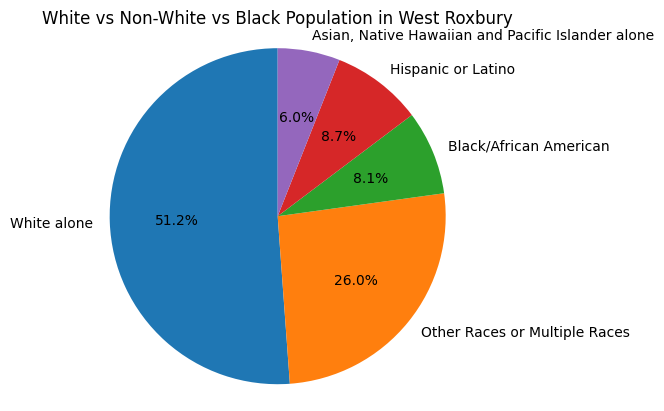

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./data/race.csv', skiprows=1)

# Convert 'field concept' column to numeric
df['Total'] = pd.to_numeric(df['Total:'], errors='coerce')
df['White alone'] = pd.to_numeric(df['White alone'], errors='coerce')
df['Black or African American alone'] = pd.to_numeric(df['Black or African American alone'], errors='coerce')
df['Hispanic or Latino'] = pd.to_numeric(df['Hispanic or Latino'], errors='coerce')
df['Asian, Native Hawaiian and Pacific Islander alone, all ages'] = pd.to_numeric(df['Asian, Native Hawaiian and Pacific Islander alone, all ages'], errors='coerce')
# Drop rows with missing values
df = df.dropna(subset=['Total', 'White alone', 'Black or African American alone', 'Hispanic or Latino', 'Asian, Native Hawaiian and Pacific Islander alone, all ages'])

# Plot the pie chart for each area
for index, row in df.iterrows():
    labels = ['White alone', 'Other Races or Multiple Races', 'Black/African American', 'Hispanic or Latino', 'Asian, Native Hawaiian and Pacific Islander alone']
    sizes = [row['White alone'], row['Total'] - row['White alone'], row['Black or African American alone'], row['Hispanic or Latino'], row['Asian, Native Hawaiian and Pacific Islander alone, all ages']]
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'White vs Non-White vs Black Population in {row["field concept"]}')
    plt.show()

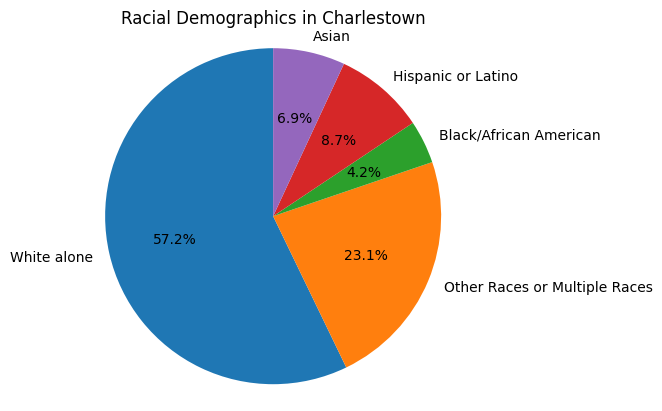

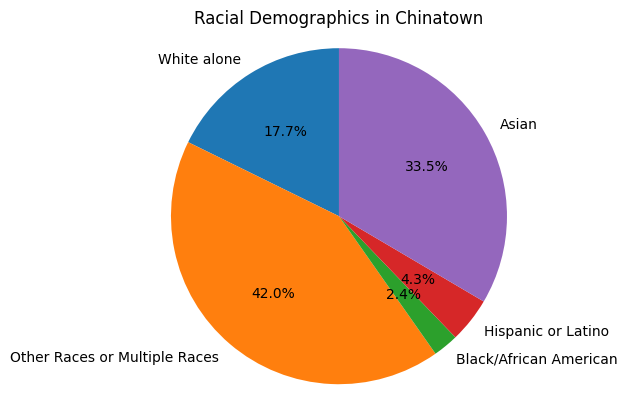

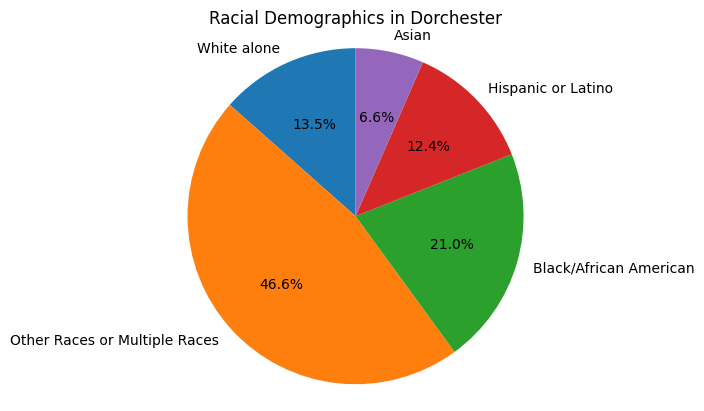

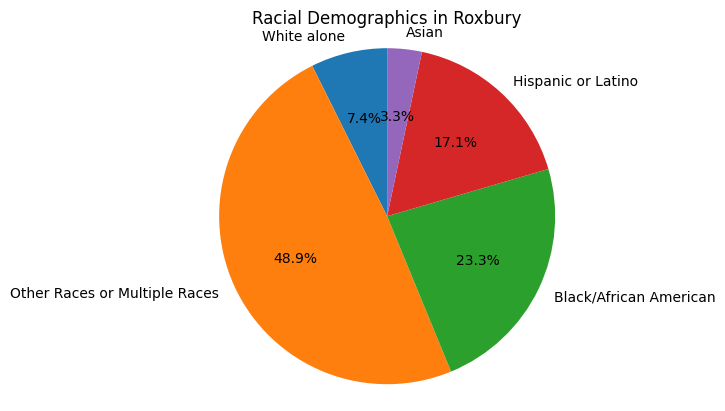

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df_budget = pd.read_csv('data/fy24-capital-budget-plan-recommended.csv')
df_budget['Total_Project_Budget'] = df_budget['Total_Project_Budget'].str.replace(',', '')
df_budget['Total_Project_Budget'] = df_budget['Total_Project_Budget'].astype(float)

# Remove "Multiple Neighborhoods" and "Citywide" from the data
df_budget = df_budget[df_budget['Neighborhood'] != 'Multiple Neighborhoods']
df_budget = df_budget[df_budget['Neighborhood'] != 'Citywide']

# Group by neighborhood and sum the total project budget
budget_by_areas = df_budget.groupby('Neighborhood')['Total_Project_Budget'].sum()

# Sort the DataFrame by total project budget in descending order
budget_by_areas = budget_by_areas.sort_values(ascending=False)

# Select the top 10 areas
top_10_areas = budget_by_areas.head(5)

# Read the race data
df_race = pd.read_csv('./data/race.csv', skiprows=1)
df_race['Total'] = pd.to_numeric(df_race['Total:'], errors='coerce')
df_race['White alone'] = pd.to_numeric(df_race['White alone'], errors='coerce')
df_race['Black or African American alone'] = pd.to_numeric(df_race['Black or African American alone'], errors='coerce')
df_race['Hispanic or Latino'] = pd.to_numeric(df_race['Hispanic or Latino'], errors='coerce')
df_race['Asian, Native Hawaiian and Pacific Islander alone, all ages'] = pd.to_numeric(df_race['Asian, Native Hawaiian and Pacific Islander alone, all ages'], errors='coerce')

# Drop rows with missing values
df_race = df_race.dropna(subset=['Total', 'White alone', 'Black or African American alone', 'Hispanic or Latino', 'Asian, Native Hawaiian and Pacific Islander alone, all ages'])

# Filter the race data for the top 10 areas
df_race_top_10 = df_race[df_race['field concept'].isin(top_10_areas.index)]

# Create pie charts for racial demographics for each of the top 10 areas
for index, row in df_race_top_10.iterrows():
    labels = ['White alone', 'Other Races or Multiple Races', 'Black/African American', 'Hispanic or Latino', 'Asian']
    sizes = [row['White alone'], row['Total'] - row['White alone'], row['Black or African American alone'], row['Hispanic or Latino'], row['Asian, Native Hawaiian and Pacific Islander alone, all ages']]
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Racial Demographics in {row["field concept"]}')
    plt.show()


The absence of a clear correlation between budget allocation by neighborhoods and specific racial demographics based on the pie charts suggests that budget allocation may not be directly tied to a single racial group in these areas.


data source: https://data.boston.gov/dataset/2020-census-for-boston/resource/5800a0a2-6acd-41a3-9fe0-1bf7b038750d